##Further Exercises


A criminologist studying the relationship between income level and assults in U.S. cities (among other things) collected the following data for 2215 communities. The dataset can be found in the [UCI machine learning site](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized).

We are interested in the per capita assult rate and its relation to median income.

In [1]:
import pandas as pd

crime = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt", 
                    header = None, na_values  = '?',
                    names = ['communityname', 'state', 'countyCode', 'communityCode', 'fold', 'population', 'householdsize', 
                             'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 
                             'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 
                             'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 
                             'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 
                             'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 
                             'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 
                             'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 
                             'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 
                             'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 
                             'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
                             'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 
                             'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 
                             'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 
                             'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 
                             'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'OwnOccQrange', 'RentLowQ', 'RentMedian', 
                             'RentHighQ', 'RentQrange', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 
                             'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 
                             'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 
                             'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
                             'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 
                             'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
                             'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 
                             'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 
                             'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 
                             'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 
                             'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop'])

1. Fit a simple linear regression model to the data with `np.log(crime.assaults)` as the dependent variable and `np.log(crime.medIncome)` as the independent variable. Plot the estimated regression line.

4. Test whether there is a linear relationship between `assaults` and `medIncome` at level $\alpha=0.05$. State the null hypothesis, the alternative, the conclusion and the $p$-value.

5. Give a 95% confidence interval for the slope of the regression line. Interpret your interval.

6. Report the $R^2$ and the adjusted $R^2$ of the model, as well as an estimate of the variance of the errors in the model.

7. Go to [archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized) and pick out a few other factors that might help you predict `assults`.

1. Fit a simple linear regression model to the data with `np.log(crime.assaults)` as the dependent variable and `np.log(crime.medIncome)` as the independent variable. Plot the estimated regression line.

In [2]:
import numpy as np
import statsmodels.formula.api as smf
from seaborn import plt

crime['assaults_log'] = np.log(crime.assaults[crime.assaults != 0])
crime['medIncome_log'] = np.log(crime.medIncome[crime.assaults != 0])
plt.scatter(crime['medIncome_log'], crime['assaults_log'])
lm = smf.ols('assaults_log ~ medIncome_log', data=crime)
fit = lm.fit()
fit.summary()

# Df Residuals - residual degrees-of-freedom
# DF Model - degrees-of-freedom model (?)
# R-squared - measures how well data matches the fit
# Adj. R-squared - adjusted R-squared (?)
# F-statistic - test statistic for variance
# Log-Likelihood - log of likelihood function
# AIC - Akaike information criterion (?)
# BIC - Bayesian information criterion

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           assaults_log   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     371.8
Date:                Tue, 26 May 2015   Prob (F-statistic):           1.24e-76
Time:                        17:38:18   Log-Likelihood:                -4047.3
No. Observations:                2184   AIC:                             8099.
Df Residuals:                    2182   BIC:                             8110.
Df Model:                           1                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        21.9740      0.927     23.713      0.000        20.157    23.791
medIncome_log    -1.7231      0.089    -19.283      0.000        -1.898    -1.548
==============================================================================
Omnibus:                       34.826   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.645
Skew:                           0.255   Prob(JB):                     2.46e-09
Kurtosis:                       3.418   Cond. No.                         293.
==============================================================================
"""

In [3]:
crime['assaults_log'] = np.log(crime.assaults[crime.assaults != 0])
crime['medIncome_log'] = np.log(crime.medIncome[crime.assaults != 0])
plt.scatter(crime['medIncome_log'], crime['assaults_log'])
lm = smf.ols('assaults_log ~ medIncome_log', data=crime)
fit = lm.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:           assaults_log   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     371.8
Date:                Tue, 26 May 2015   Prob (F-statistic):           1.24e-76
Time:                        17:38:21   Log-Likelihood:                -4047.3
No. Observations:                2184   AIC:                             8099.
Df Residuals:                    2182   BIC:                             8110.
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        21.9740      0.927     23.713      0.000        20.157    23.791
medIncome_log    -1.7231      0.089    -19.

In [25]:
np.reshape?

In [5]:
import sklearn.linear_model as linear_model
import math

x_train = crime['medIncome_log'].values.reshape(-1,1)
y_train = crime['assaults_log'].values

def cleanup(data):
    for i in range(len(data)):
        d = data[i]
        if math.isnan(d) or d == float('infinity') or d == float('-infinity'):
            data[i] = 0
            print i, "set to zero from bad value"
        
cleanup(x_train)
#cleanup(y_train)

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

plt.scatter(x_train, y_train, color='black', s=1)
plt.plot(x_train, regr.predict(x_train), color='blue', linewidth=3)

#plt.show()

ValueError: array must not contain infs or NaNs

In [26]:
#crime['medIncome_log'].values.reshape

In [27]:
#crime['medIncome_log'].values.reshape(-1,1)

In [6]:
import pandas as pd

x_train = crime['medIncome_log'].values.reshape(-1,1)

# FIXME: use isnan, fillna, etc. instead here
# cleanup X data
for i in range(len(x_train)):
    x = x_train[i]
    if math.isnan(x) or x == float('infinity') or x == float('-infinity'):
        x_train[i] = 0
        print "x_train", i, "set to zero from bad value"

print "x_train\n", "type", type(x_train), "len", len(x_train), "shape", np.shape(x_train), x_train

y_train = crime['assaults_log'].values
print "y_train\n", "type", type(y_train), "\n", "len", len(y_train), "\n", "shape", np.shape(y_train), "\n", y_train

# cleanup Y data
for i in range(len(y_train)):
    y = y_train[i]
    if math.isnan(y) or y == float('infinity') or y == float('-infinity'):
        y_train[i] = 0
        print "y_train", i, "set to zero from bad value"
    
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print "residuals", regr.residues_
print "Coefficients: \n", regr.coef_

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(x_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_train, y_train))
print "intercept", regr.intercept_

# Plot outputs
#plt.scatter(x_train, y_train, color='black', s=1)
#plt.plot(x_train, regr.predict(x_train), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())
#plt.show()

x_train
type <type 'numpy.ndarray'> len 2215 shape (2215, 1) [[ 11.22686874]
 [ 10.77722563]
 [ 10.48203724]
 ..., 
 [ 10.21031027]
 [  9.89842476]
 [ 10.05565054]]
y_train
type <type 'numpy.ndarray'> 
len 2215 
shape (2215,) 
[ 1.38629436  3.17805383  2.63905733 ...,  4.56434819  4.36944785
  5.02388052]
y_train 223 set to zero from bad value
y_train 296 set to zero from bad value
y_train 358 set to zero from bad value
y_train 436 set to zero from bad value
y_train 462 set to zero from bad value
y_train 539 set to zero from bad value
y_train 721 set to zero from bad value
y_train 727 set to zero from bad value
y_train 818 set to zero from bad value
y_train 828 set to zero from bad value
y_train 836 set to zero from bad value
y_train 960 set to zero from bad value
y_train 1196 set to zero from bad value
y_train 1222 set to zero from bad value
y_train 1355 set to zero from bad value
y_train 1363 set to zero from bad value
y_train 1378 set to zero from bad value
y_train 1396 set to zero 

In [9]:
x_train = crime['medIncome'].values.reshape(-1,1)

crime['assault_rate'] = (crime['assaults'] / crime['population']) * 100000

y_train = crime['assault_rate'].values

# cleanup Y data
for i in range(len(y_train)):
    y = y_train[i]
    if math.isnan(y) or y == float('infinity') or y == float('-infinity'):
        y_train[i] = 0
        print "y_train", i, "set to zero from bad value"

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print "residuals", regr.residues_
print "Coefficients: \n", regr.coef_

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(x_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_train, y_train))
print "intercept", regr.intercept_

plt.scatter(x_train, y_train, color='black', s=1)
plt.plot(x_train, regr.predict(x_train), color='blue', linewidth=3)

plt.show()

y_train 223 set to zero from bad value
y_train 296 set to zero from bad value
y_train 358 set to zero from bad value
y_train 436 set to zero from bad value
y_train 539 set to zero from bad value
y_train 727 set to zero from bad value
y_train 818 set to zero from bad value
y_train 836 set to zero from bad value
y_train 1378 set to zero from bad value
y_train 1627 set to zero from bad value
y_train 1723 set to zero from bad value
y_train 1857 set to zero from bad value
y_train 2157 set to zero from bad value
residuals 387548973.919
Coefficients: 
[-0.01367608]
Residual sum of squares: 174965.68
Variance score: 0.16
intercept 862.384254765


TypeError: bad argument type for built-in operation

In [7]:
print x_train
print y_train
est = make_pipeline(PolynomialFeatures(3), Ridge(alpha=0.05))
est.fit(crime['medIncome'].values, y_train)
x_plot = list(range(0, 200000, 10000))
#x_plot = [[0], [1000], [5000], [10000], [50000], [100000], [200000]]
y_plot = est.predict(x_plot)

#print fit
#print(est)
#fit.summary()

[[ 11.22686874]
 [ 10.77722563]
 [ 10.48203724]
 ..., 
 [ 10.21031027]
 [  9.89842476]
 [ 10.05565054]]
[ 1.38629436  3.17805383  2.63905733 ...,  4.56434819  4.36944785
  5.02388052]


NameError: name 'make_pipeline' is not defined

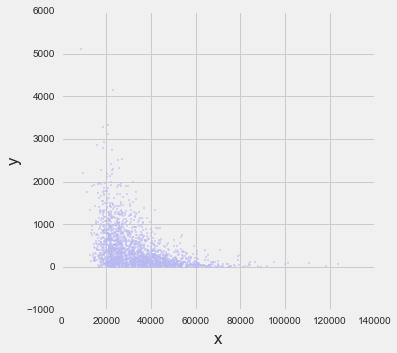

In [47]:
fig,ax = plt.subplots(1,1)

def plot_approximation(x_plot, est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    #ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(x_train, y_train, s=1)
    #ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    #ax.set_ylim((-2, 2))
    #ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

#x_plot = list(range(0, 200000, 1000))
#plot_approximation(x_plot, est, ax)

In [11]:
# question 2
lm = smf.ols('assault_rate ~ medIncome', data=crime)
fit = lm.fit(alpha=0.05)
print fit.pvalues
print fit.summary()

Intercept    4.072131e-220
medIncome     9.910190e-87
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           assault_rate   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     426.2
Date:                Tue, 26 May 2015   Prob (F-statistic):           9.91e-87
Time:                        17:51:05   Log-Likelihood:                -16513.
No. Observations:                2215   AIC:                         3.303e+04
Df Residuals:                    2213   BIC:                         3.304e+04
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    862.3843     24.207     35.626      0.000       8

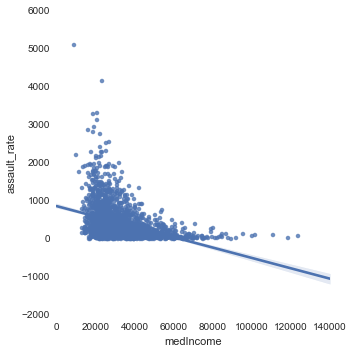

In [14]:
%matplotlib inline

# TODO: to make this look better use log(x) vs log(y)
import seaborn as sns
sns.lmplot('medIncome', 'assault_rate', crime) # this is using 95% confidence interval